<a href="https://colab.research.google.com/github/haruka20010217/test/blob/master/6_4%E3%82%BC%E3%83%9F.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip --no-cache-dir install opencv-python==4.4.0.44

     |████████████████████████████████| 49.5MB 1.3MB/s 
ERROR: albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.9 which is incompatible.
  Found existing installation: opencv-python 4.1.2.30
    Uninstalling opencv-python-4.1.2.30:
      Successfully uninstalled opencv-python-4.1.2.30


In [2]:
# 各種インポート
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
# 画像の読み込み
tokyo_tower = cv2.imread('tokyo_tower.png')
print(type(tokyo_tower))

<class 'numpy.ndarray'>


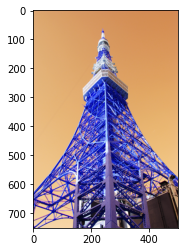

In [4]:
# ひとまず画像を表示してみる（間違い。色合いがおかしい）
plt.imshow(tokyo_tower)

In [5]:
# BGRの画像をRGBに変換
rgb_tower = cv2.cvtColor(tokyo_tower, cv2.COLOR_BGR2RGB)

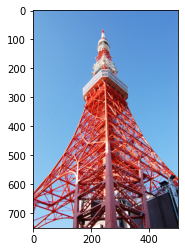

In [6]:
plt.imshow(rgb_tower)

In [7]:
# グレースケールで読み込む
gray_tower = cv2.imread('tokyo_tower.png', cv2.IMREAD_GRAYSCALE)

In [8]:
# すでに読み込んだものをグレースケール化する
gray_tower02 = cv2.cvtColor(tokyo_tower, cv2.COLOR_BGR2GRAY)

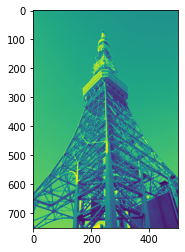

In [9]:
plt.imshow(gray_tower)

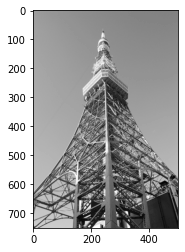

In [10]:
plt.imshow(gray_tower, cmap='gray')

In [11]:
cv2.imwrite('tokyo_tower_gray.png', gray_tower)

True

In [12]:
cv2.imwrite('tokyo_tower_copy.png', tokyo_tower)

True

In [13]:
cv2.imwrite('tokyo_tower_copy_ng.png', rgb_tower)

True

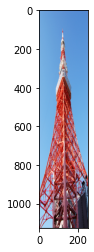

In [16]:
M = np.float32([[0.5, 0, 0], [0, 1.5, 0]])#0.5,1.5が拡大の数字
tokyo_tower_resized = cv2.warpAffine(tokyo_tower, M, (250, 1125))#キャンバス
plt.imshow(cv2.cvtColor(tokyo_tower_resized, cv2.COLOR_BGR2RGB))

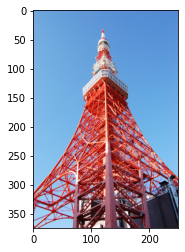

In [17]:
# 画像のリサイズ
tokyo_tower_resized2 = cv2.resize(tokyo_tower, (250, 375))

# リサイズした画像を表示
plt.imshow(cv2.cvtColor(tokyo_tower_resized2, cv2.COLOR_BGR2RGB))

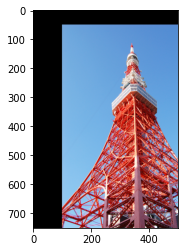

In [20]:
# 画像の平行移動（横に100, 縦に50）
M = np.float32([[1, 0, 100], [0, 1, 50]])
# 引数の最後は出力する画像サイズ
tokyo_tower_translated = cv2.warpAffine(tokyo_tower, M, (500, 750))
# 平行移動した画像を表示
plt.imshow(cv2.cvtColor(tokyo_tower_translated, cv2.COLOR_BGR2RGB))

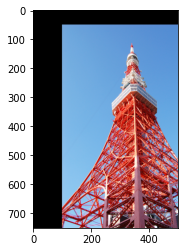

In [22]:
h, w, c = tokyo_tower.shape
tokyo_tower_translated = cv2.warpAffine(tokyo_tower, M, (w, h))
plt.imshow(cv2.cvtColor(tokyo_tower_translated, cv2.COLOR_BGR2RGB))

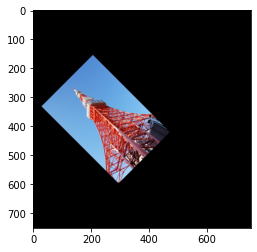

In [28]:
h, w, c = tokyo_tower.shape
M = cv2.getRotationMatrix2D((w/2, h/2), 45, 1/2)
tokyo_tower_rotated = cv2.warpAffine(tokyo_tower, M, (750, 750))
plt.imshow(cv2.cvtColor(tokyo_tower_rotated, cv2.COLOR_BGR2RGB))

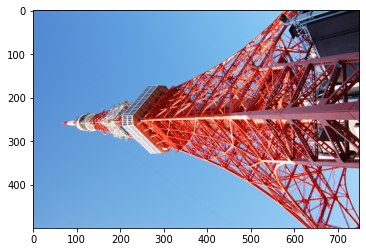

In [29]:
# 元の画像サイズを取得
h, w, c = tokyo_tower.shape

# ①125だけ左に移動、表示領域を(750, 750)=(h, h)に広げる
M1 = np.float32([[1, 0, 125], [0, 1, 0]])
tokyo_tower_tr1 = cv2.warpAffine(tokyo_tower, M1, (h, h))

# ②中心点は(375, 375)=(w/2+125, h/2)で、反時計回りに90度回転
M2 = cv2.getRotationMatrix2D((w/2+125, h/2), 90, 1)
# 出力画像サイズは(750, 750)=(h, h)
tokyo_tower_tr2 = cv2.warpAffine(tokyo_tower_tr1, M2, (h, h))

# ③上に125（縦方向に-125）移動。表示領域を(750,500)=(h, w)にする
M3 = np.float32([[1, 0, 0], [0, 1, -125]])
tokyo_tower_tr3 = cv2.warpAffine(tokyo_tower_tr2, M3, (h, w))

# 平行移動と回転をさせた画像を表示
plt.imshow(cv2.cvtColor(tokyo_tower_tr3, cv2.COLOR_BGR2RGB))

In [30]:
# 90度回転した画像を保存
cv2.imwrite('tokyo_tower_tr.png', tokyo_tower_tr3)

True

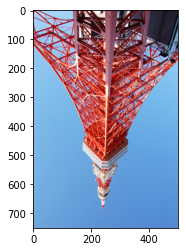

In [31]:
# 上下反転
tokyo_tower_ud = cv2.flip(tokyo_tower, 0)

# 反転させた画像を表示
plt.imshow(cv2.cvtColor(tokyo_tower_ud, cv2.COLOR_BGR2RGB))

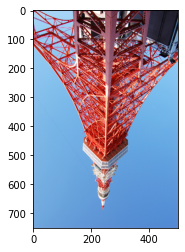

In [52]:
#アフェイン変換で上下反転
M = np.float32([[1,0,0],[0,-1,750]])
tokyo_tower_rotated = cv2.warpAffine(tokyo_tower, M, (w, h))
plt.imshow(cv2.cvtColor(tokyo_tower_rotated, cv2.COLOR_BGR2RGB))

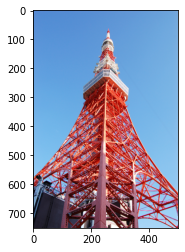

In [41]:
#アフェイン変換で左右反転
M = np.float32([[-1,0,w],[0,1,0]])
tokyo_tower_rotated = cv2.warpAffine(tokyo_tower, M, (w, h))
plt.imshow(cv2.cvtColor(tokyo_tower_rotated, cv2.COLOR_BGR2RGB))

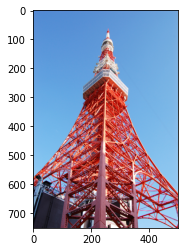

In [32]:
# 左右反転
tokyo_tower_lr = cv2.flip(tokyo_tower, 1)

# 反転させた画像を表示
plt.imshow(cv2.cvtColor(tokyo_tower_lr, cv2.COLOR_BGR2RGB))